In [163]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [164]:
class Adaline:
    
    def __init__(self, x):
        np.random.seed(59)
        self.weights = np.random.rand(x.shape[1])
        
        self.pretrained = False
        self.EQM = 0

 
    def train(self, epochs, LR, X_train, Y_train, batch, stop):
            
            
            acc = []
            
            # porcentagem de erro (1 - acc)
            errors = []
            
            iterations = X_train.shape[0]

            # atualiza peso a cada epoch, ou seja, depois de percorrer todo conjunto de dados
            if batch == True:
                eqm = 0
                for epoch in range(epochs):
                    u = np.dot(X_train, self.weights)

                    
                    
                    
                    error = np.sum((Y_train != np.sign(u)).astype(int))

                    
                    self.weights = self.weights + LR * np.dot((Y_train - u),  X_train)
                    
                    errors.append(error/iterations)
                    acc.append(1 - (error/iterations))
                    
                    # calculo do erro quadrático médio para early stopping
                    prev_eqm = eqm
                    eqm = np.mean((Y_train - u) **2)


                    if (abs(prev_eqm - eqm) <= stop):
                         print(f"Diferença do EQM: {abs(prev_eqm - eqm)}")
                         print(f"Atingiu a convergência na epoch {epoch}")
                         break # quebra o loop for


                    
                    
            # atualiza peso a cada iteração
            else:
                eqm = 0

                for epoch in range(epochs):
                    erros = 0
                    acertos = 0
                    
                    prev_eqm = eqm
                    for i in range (iterations):
                        u = np.dot(self.weights, X_train[i])
                        
                        eqm += (Y_train[i] - u) **2
                        
                        self.weights = self.weights + LR *( (Y_train[i] - u) * X_train[i])
                        
                        erros += int(Y_train[i] != np.sign(u))
                        
                    eqm = eqm/iterations
                    errors.append(erros/iterations)
                    acc.append(1 - (erros/iterations))
                    if (abs(prev_eqm - eqm) <= stop):
                        print(f"Diferença do EQM: {abs(prev_eqm - eqm)}")

                        print(f"Atingiu a convergência na epoch {epoch}")
                        break # quebra o loop for

                        
                        
            self.loss = errors
            self.acc_train = acc
            self.pretrained = True
                
        
        
        
    def eval(self, X_test, Y_test):
        if not self.pretrained :
            raise RuntimeError("Model is not pretrained")
        
        erros = 0
        acertos = 0
        iterations = X_test.shape[0]

        for i in range(iterations):
            u = np.dot(X_test[i], self.weights)

            y = np.sign(u)
                        
            erros += int(Y_test[i] != y)
            acertos += int(Y_test[i] == y)
            

        

        return erros/iterations, acertos/iterations
    
        
        
        
    def plot_training_metrics(self, concat=""):
        
            if not self.pretrained:
                raise RuntimeError("Modelo precisa estar treinado antes")

            plt.figure(figsize=(12, 6))

            plt.subplot(1, 2, 1)
            sns.lineplot(x=range(len(self.loss)), y=self.loss, marker='o')
            plt.title("Perda (Loss) durante o Treinamento" + concat)
            plt.xlabel("Épocas")
            plt.ylabel("Loss")
            plt.ylim(0, 1)  #

            plt.subplot(1, 2, 2)
            sns.lineplot(x=range(len(self.acc_train)), y=self.acc_train, marker='o')
            plt.title("Acurácia durante o Treinamento" + concat)
            plt.xlabel("Épocas")
            plt.ylabel("Acurácia")
            plt.ylim(0, 1)  

            plt.tight_layout()
            plt.show()
            
            
    def plot_decision_boundary_train(self, X_train, Y_train):
            if not self.pretrained:
                raise RuntimeError("Modelo precisa estar treinado antes de plotar a fronteira de decisão")


            # Removendo o bias do conjunto
            X_train  = X_train[:, 1:]
            self.weights= self.weights[1:]

            plt.figure(figsize=(10, 6))

            
            sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=Y_train, palette='coolwarm', style=Y_train, markers=['o', 's'], s=100)

            x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
            y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
            xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

            Z = np.dot(np.c_[xx.ravel(), yy.ravel()], self.weights)  
            Z = Z.reshape(xx.shape)

            plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='k', linestyles='--')

            plt.title("Fronteira de Decisão - Dados de Treinamento")
            plt.xlabel("x1")
            plt.ylabel("x2")
            plt.legend(title="Classes")
            plt.tight_layout()
            plt.show()
    
            
            
    def plot_decision_boundary_test(self, X_test, Y_test):
            if not self.pretrained:
                raise RuntimeError("Modelo precisa estar treinado antes de plotar a fronteira de decisão")



            # Removendo o bias do conjunto
            X_test  = X_test[:, 1:]
            plt.figure(figsize=(10, 6))

            sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=Y_test, palette='coolwarm', style=Y_test, markers=['X', 'D'], s=100)

        
            x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
            y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
            xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

            Z = np.dot(np.c_[xx.ravel(), yy.ravel()], self.weights)  # produto escalar
            Z = Z.reshape(xx.shape)

            plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='k', linestyles='--')

            plt.title("Fronteira de Decisão - Dados de Teste")
            plt.xlabel("x1")
            plt.ylabel("x2")
            plt.legend(title="Classes")
            plt.tight_layout()
            plt.show()



## Lendo arquivos dataset

In [165]:

def load_file_dataset(filename):
    df_train = pd.read_csv(filename)
    
    X =  df_train.drop('label', axis=1).values
    Y = df_train['label'].values

    # adicionando bias constante 1
    X = np.hstack((np.ones((X.shape[0], 1)), X))


    
    return X, Y 




## Dataset 1


Para batch = True
Diferença do EQM: 0.000863949595491631
Atingiu a convergência na epoch 24
 Melhor acurácia encontrada na epoch 16: 0.979


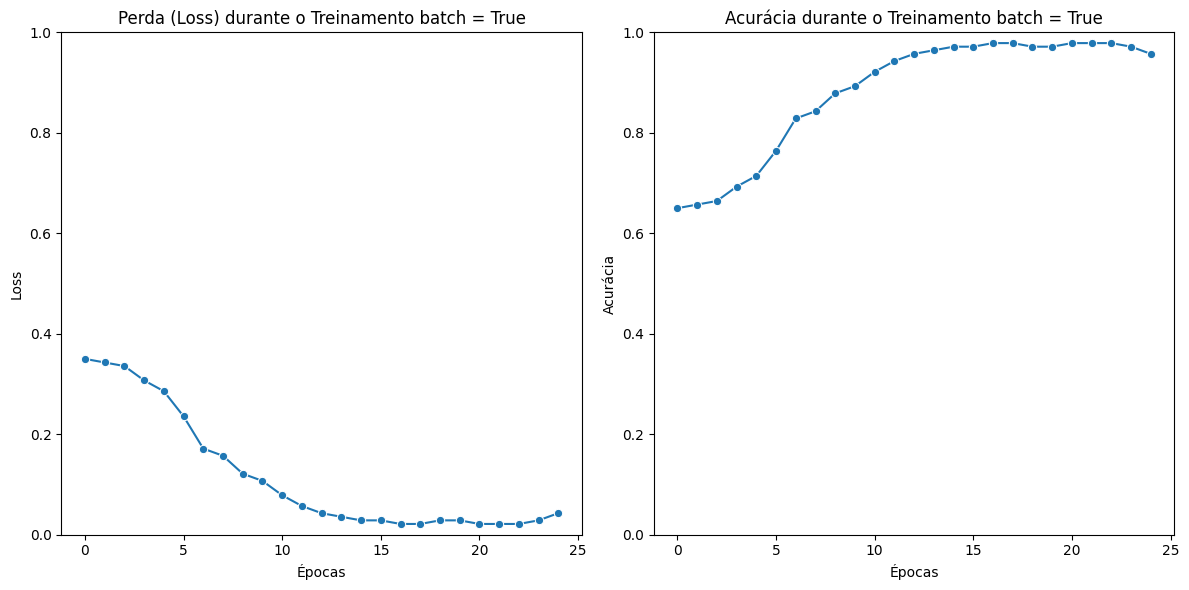

 Perda nos dados de teste: 0.05
 Acurácia nos dados de teste: 0.95


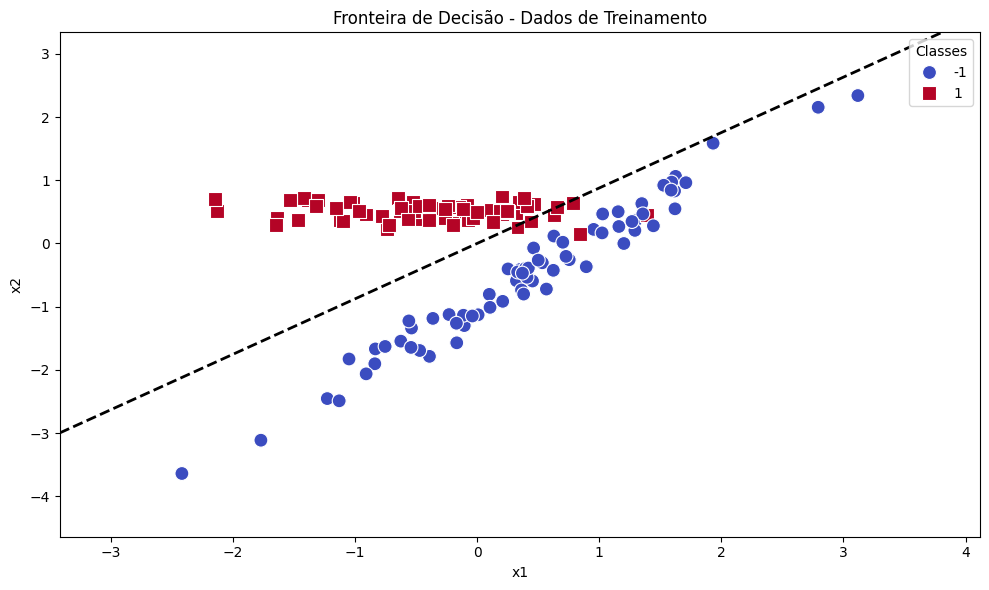

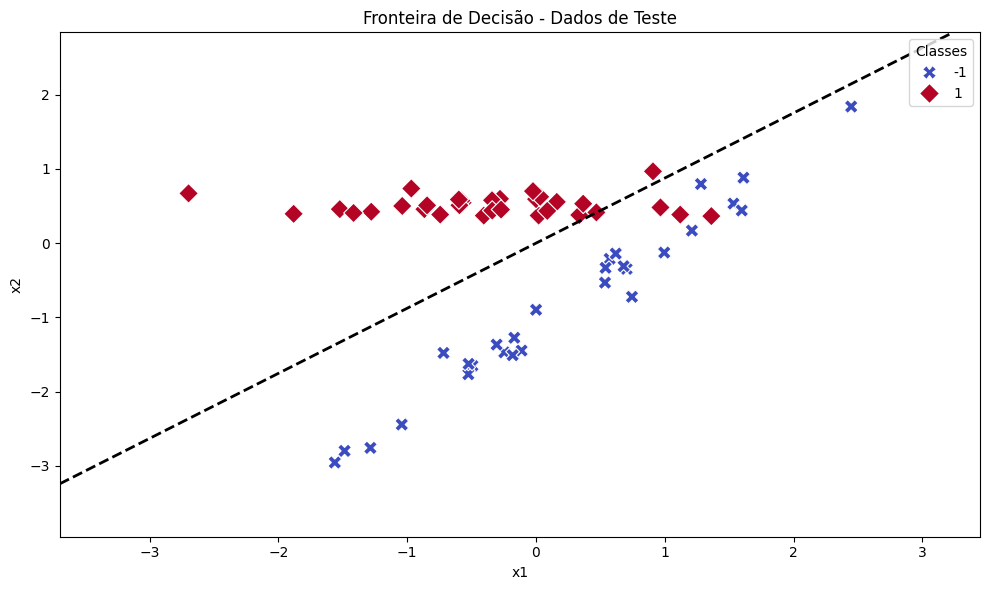

Para batch = false
Diferença do EQM: 0.0009999162046735455
Atingiu a convergência na epoch 24
 Melhor acurácia encontrada na epoch 16: 0.979


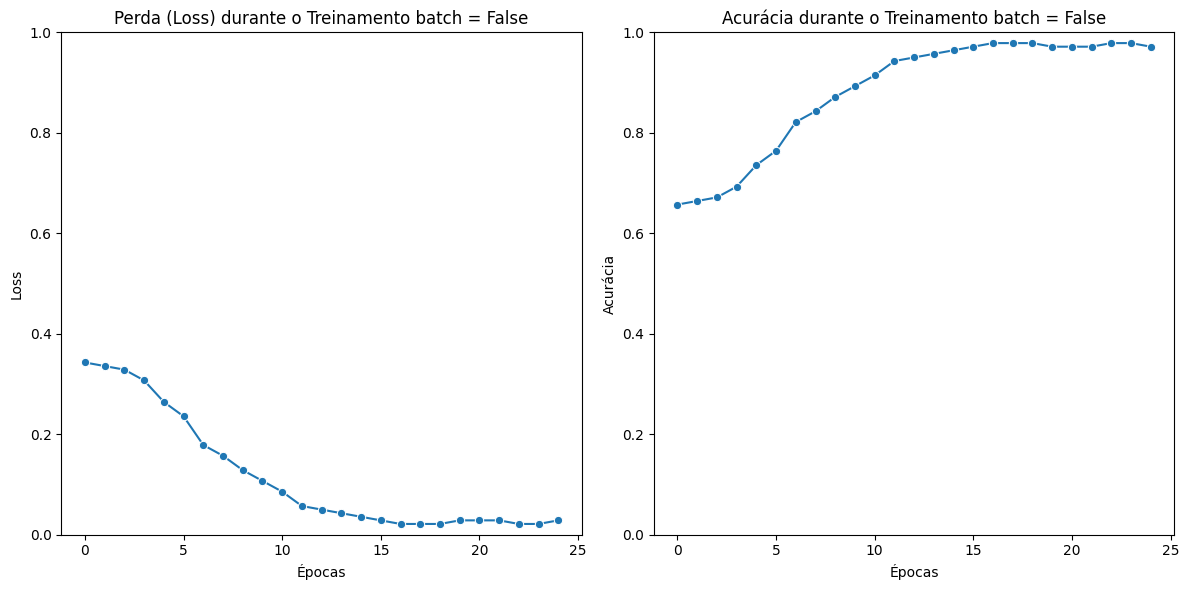

 Perda nos dados de teste: 0.05
 Acurácia nos dados de teste: 0.95


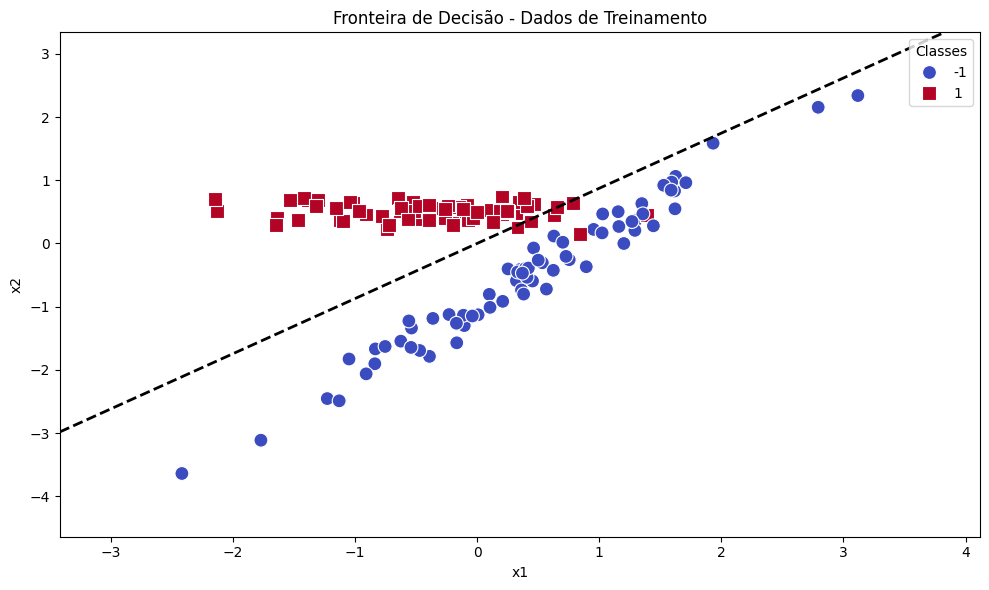

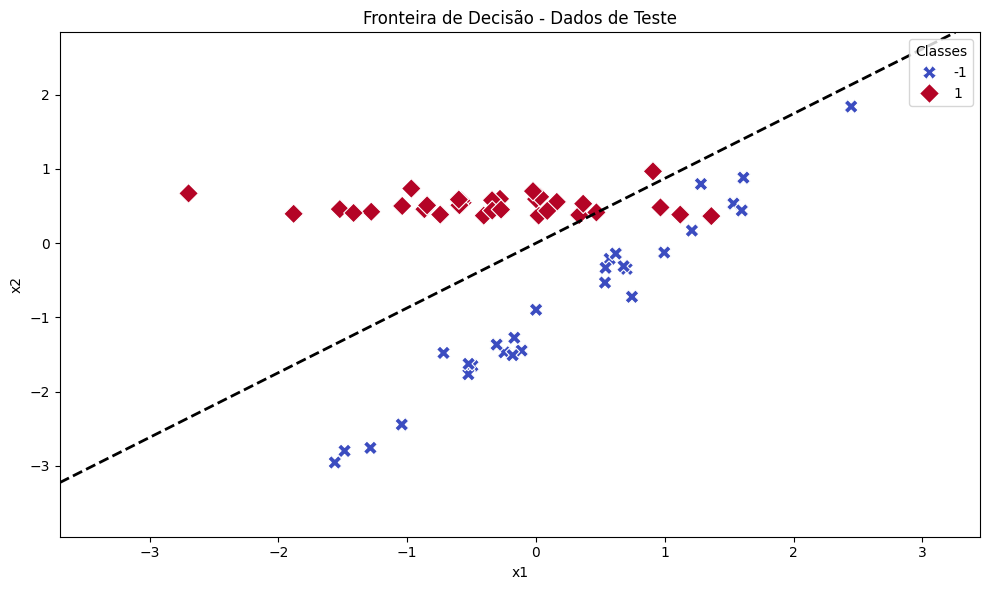

In [ ]:

X_train, Y_train = load_file_dataset("train_dataset1.csv")
X_test, Y_test = load_file_dataset("test_dataset1.csv")


print("Para batch = True")
adaline = Adaline(x=X_train)

adaline.train(100, 0.001, X_train, Y_train, batch=True, stop=0.001)

best_epoch = np.argmin(adaline.loss)
print(f" Melhor acurácia encontrada na epoch {best_epoch }: {round(adaline.acc_train[best_epoch],3)}")

adaline.plot_training_metrics(f" batch = True")


loss, acc = adaline.eval(X_test, Y_test)

print(f" Perda nos dados de teste: {round (loss,3)}")
print(f" Acurácia nos dados de teste: {round(acc, 3)}")

adaline.plot_decision_boundary_train(X_train, Y_train)
adaline.plot_decision_boundary_test(X_test, Y_test)





## agora para batch = false
print("Para batch = False")

adaline = Adaline(x=X_train)

adaline.train(100, 0.001, X_train, Y_train, batch=False, stop=0.001)

best_epoch = np.argmin(adaline.loss)
print(f" Melhor acurácia encontrada na epoch {best_epoch }: {round(adaline.acc_train[best_epoch],3)}")

adaline.plot_training_metrics(f" batch = False")


loss, acc = adaline.eval(X_test, Y_test)

print(f" Perda nos dados de teste: {round (loss,3)}")
print(f" Acurácia nos dados de teste: {round(acc, 3)}")

adaline.plot_decision_boundary_train(X_train, Y_train)
adaline.plot_decision_boundary_test(X_test, Y_test)



## Dataset 2

Diferença do EQM: 0.0009274394026352883
Atingiu a convergência na epoch 35
 Melhor acurácia encontrada na epoch 11: 0.686


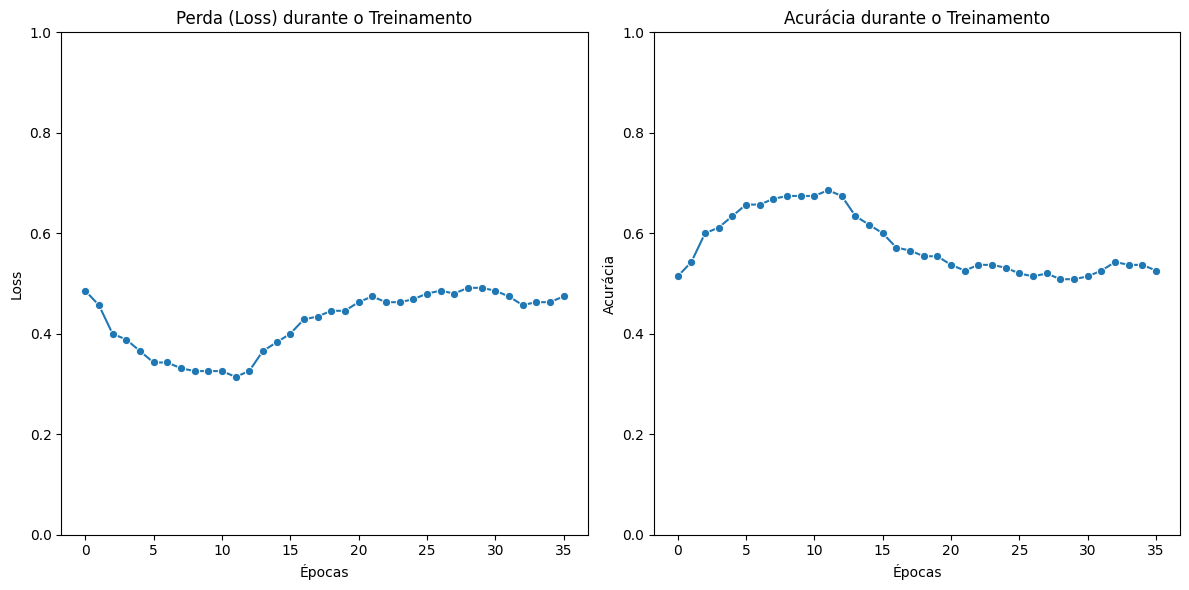

 Perda nos dados de teste: 0.493
 Acurácia nos dados de teste: 0.507


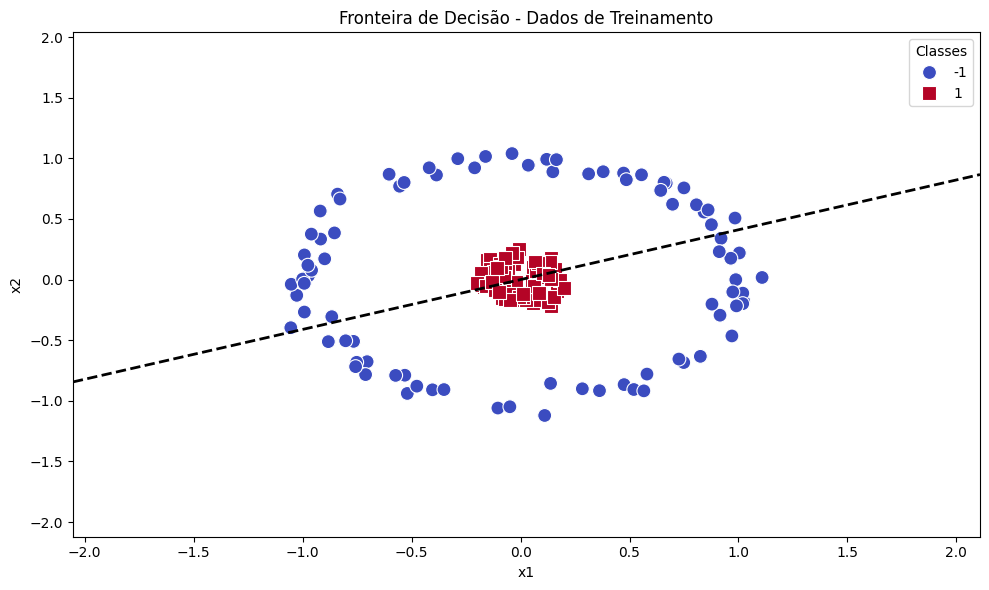

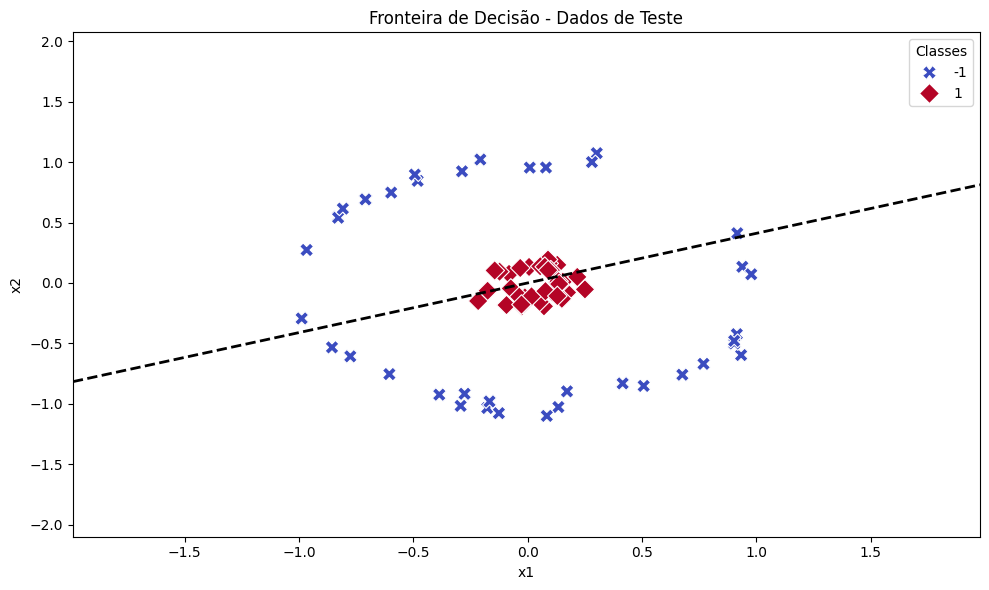

In [ ]:

X_train, Y_train = load_file_dataset("train_dataset2.csv")
X_test, Y_test = load_file_dataset("test_dataset2.csv")


print("para Batch = True")
adaline = Adaline(x=X_train)

adaline.train(100, 0.001, X_train, Y_train, batch=True, stop=0.001)

best_epoch = np.argmin(adaline.loss)
print(f" Melhor acurácia encontrada na epoch {best_epoch }: {round(adaline.acc_train[best_epoch],3)}")

adaline.plot_training_metrics()


loss, acc = adaline.eval(X_test, Y_test)

print(f" Perda nos dados de teste: {round (loss,3)}")
print(f" Acurácia nos dados de teste: {round(acc, 3)}")

adaline.plot_decision_boundary_train(X_train, Y_train)
adaline.plot_decision_boundary_test(X_test, Y_test)




print("para Batch = False")
adaline = Adaline(x=X_train)

adaline.train(100, 0.001, X_train, Y_train, batch=False, stop=0.001)

best_epoch = np.argmin(adaline.loss)
print(f" Melhor acurácia encontrada na epoch {best_epoch }: {round(adaline.acc_train[best_epoch],3)}")

adaline.plot_training_metrics()


loss, acc = adaline.eval(X_test, Y_test)

print(f" Perda nos dados de teste: {round (loss,3)}")
print(f" Acurácia nos dados de teste: {round(acc, 3)}")

adaline.plot_decision_boundary_train(X_train, Y_train)
adaline.plot_decision_boundary_test(X_test, Y_test)


##  Dataset 3

 Resultados para LR = 0.001 e parada = 0.1
Diferença do EQM: 0.09230433030197771
Atingiu a convergência na epoch 7
 Melhor acurácia encontrada na epoch 7: 0.85
 Acurácia média 0.735
 Perda nos dados de teste: 0.159
 Acurácia nos dados de teste: 0.841


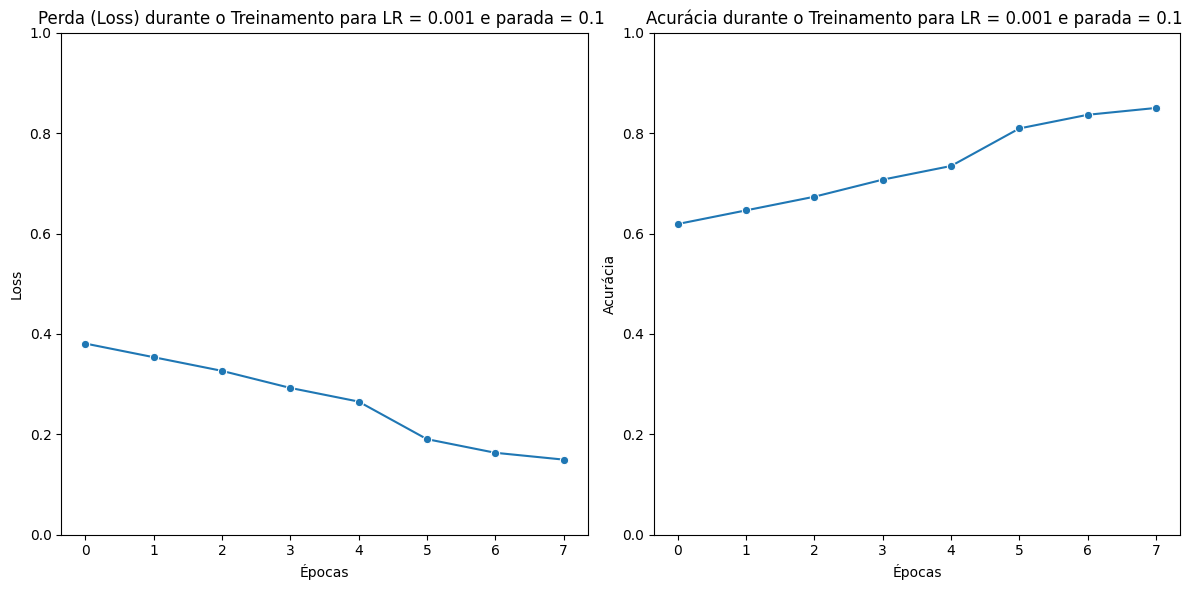

 Resultados para LR = 0.001 e parada = 0.0001
Diferença do EQM: 9.952796557222143e-05
Atingiu a convergência na epoch 34
 Melhor acurácia encontrada na epoch 20: 0.946
 Acurácia média 0.887
 Perda nos dados de teste: 0.143
 Acurácia nos dados de teste: 0.857


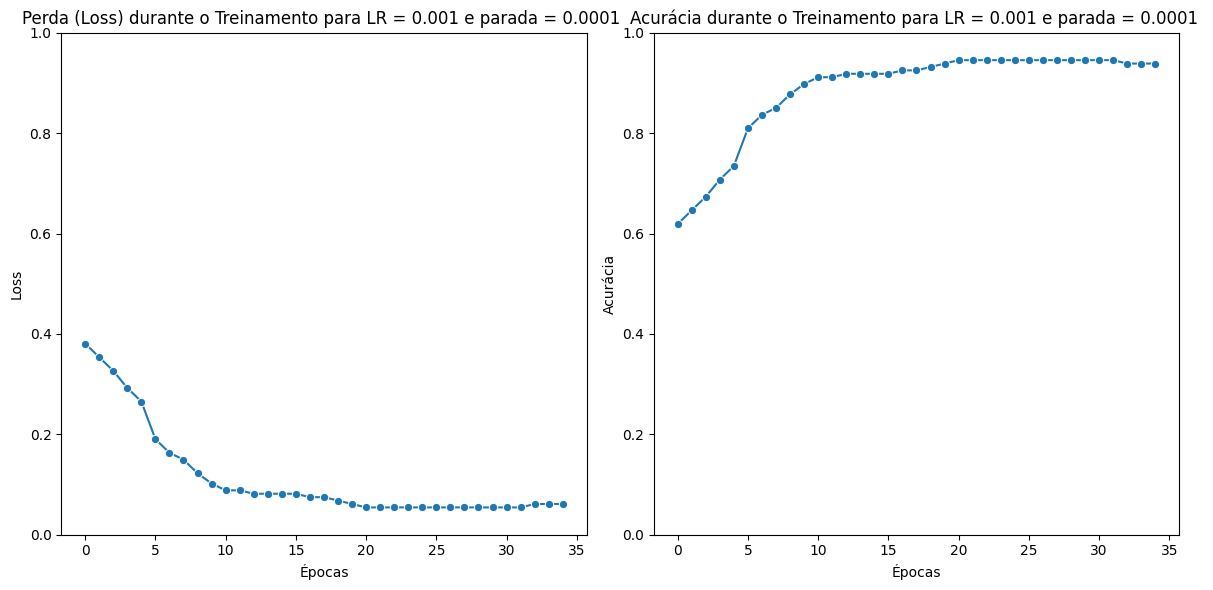

 Resultados para LR = 0.0001 e parada = 0.1
Diferença do EQM: 0.099866653055801
Atingiu a convergência na epoch 11
 Melhor acurácia encontrada na epoch 11: 0.646
 Acurácia média 0.626
 Perda nos dados de teste: 0.317
 Acurácia nos dados de teste: 0.683


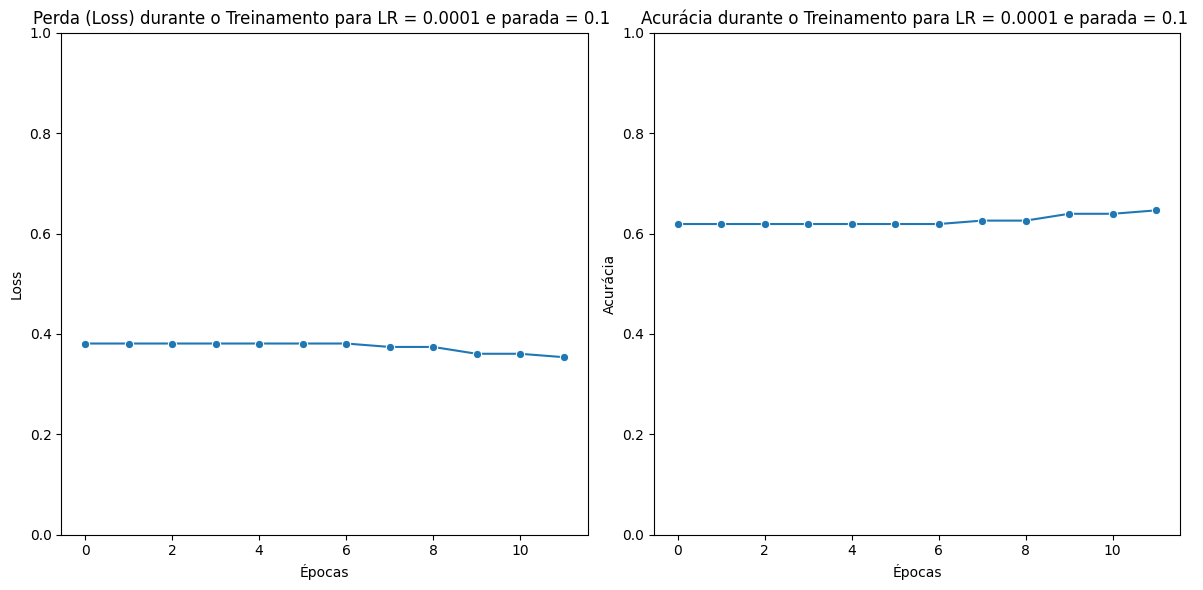

 Resultados para LR = 0.0001 e parada = 0.0001
 Melhor acurácia encontrada na epoch 94: 0.898
 Acurácia média 0.765
 Perda nos dados de teste: 0.143
 Acurácia nos dados de teste: 0.857


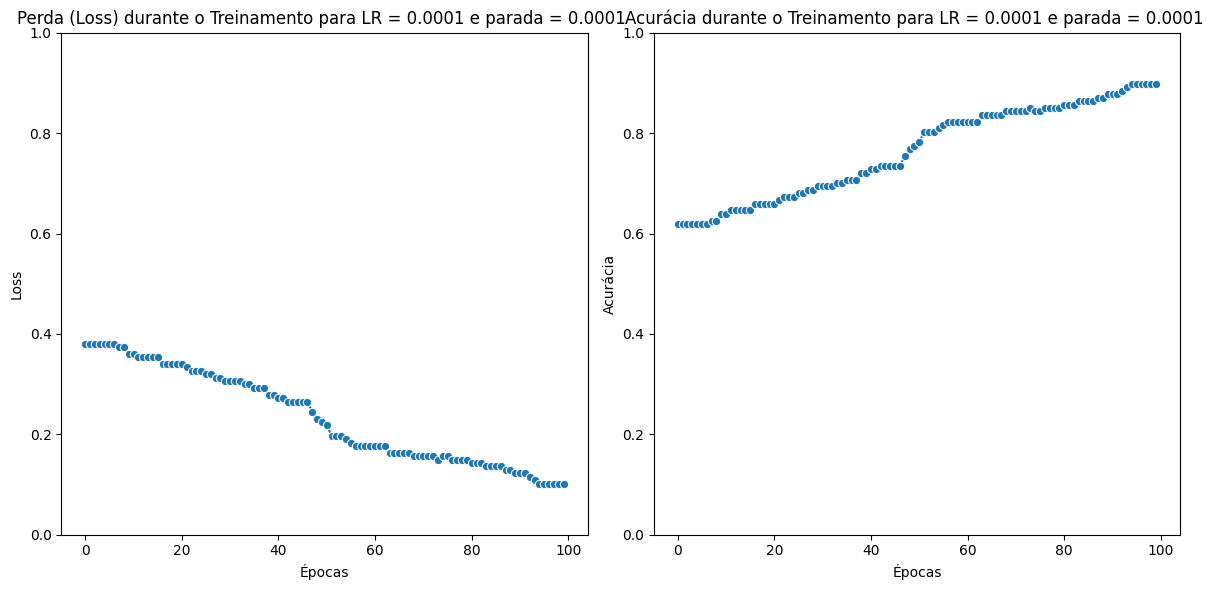

In [168]:
X_train, Y_train = load_file_dataset("train_dataset3.csv")
X_test, Y_test = load_file_dataset("test_dataset3.csv")

LR = [0.001, 0.0001]
stops = [0.1, 0.0001]


acc_treino = []
acc_eval = []
for lr in LR:

    for stop in stops:
        print(f" Resultados para LR = {lr} e parada = {stop}")

        adaline = Adaline(x=X_train)

        adaline.train(100, lr, X_train, Y_train, batch=True, stop=stop)

        best_epoch = np.argmin(adaline.loss)

        print(f" Melhor acurácia encontrada na epoch {best_epoch}: {round(adaline.acc_train[best_epoch],3)}")
        print(f" Acurácia média {round (np.mean(adaline.acc_train),3)}")


        loss, acc = adaline.eval(X_test, Y_test)

        print(f" Perda nos dados de teste: {round (loss,3)}")
        print(f" Acurácia nos dados de teste: {round(acc, 3)}")

        adaline.plot_training_metrics(f" para LR = {lr} e parada = {stop} ")

        acc_treino.append(np.mean(adaline.acc_train))
        acc_eval.append(acc)

    